In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch.utils.data import dataset ,dataloader
from termcolor import colored

device = ("cuda" if torch.cuda.is_available() else "cpu")

SEED=1
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# First Generate data

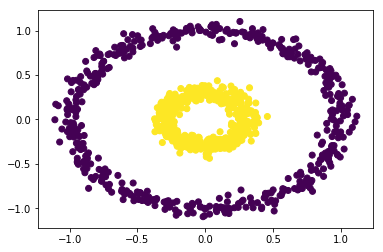

In [269]:
batch_size = 32

X, y = make_circles(n_samples=1000,factor=.3, noise=.05)

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,)

X_train, X_test, y_train, y_test = torch.from_numpy(X_train), torch.from_numpy(X_test) , torch.from_numpy(y_train),torch.from_numpy(y_test)

trainset = dataset.TensorDataset(X_train , y_train)
valset = dataset.TensorDataset(X_test , y_test)

train_loader = dataloader.DataLoader(trainset , batch_size=batch_size , shuffle=True)
val_loader = dataloader.DataLoader(valset , batch_size=batch_size , shuffle=True)

plt.scatter(X[: , 0] , X[:,1] ,c=y)

In [0]:
def train(model,criterion , optimizer , loader ,epoch):
    model.train()
    for phase in loader.keys():
        total_loss= 0.0
        total_acc = 0.0
        if phase is "train":
            model.train()
        else:
            model.eval()
        for i , (x,y) in enumerate(loader[phase]):

            x=  x.float().to(device)
            y = y.to(device)
            
            with torch.set_grad_enabled(phase=="train") :
                output = model(x)

                loss = criterion(output,y)
                
                total_acc += torch.sum(torch.argmax(output,1) == y).float().item()
                total_loss += loss.item() * x.size(0)

                if phase=="train":
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()


        total_loss = total_loss / len(loader[phase].dataset)
        total_acc = total_acc / len(loader[phase].dataset)
            
        print(colored(f"Total {phase} Loss for {epoch} is {total_loss} and Accuracy is {total_acc}" , "red" if phase=="train" else "blue") )   
    

In [0]:
def testTheOptimizer(optimizer , **kwargs):
    model = nn.Sequential(nn.Linear(2,10),
                           nn.ReLU(),
                           nn.Linear(10,2)).to(device)
    criterion = nn.CrossEntropyLoss()
    epochs=10
    loader={"train":train_loader,"val":val_loader}        
    optimizer = optimizer(model  ,**kwargs)
    for epoch in range(1,epochs+1):
        train(model , criterion , optimizer ,loader , epoch)

SGD

In [0]:
class SGD:
    def __init__(self,model , lr):
        self.model= model
        self.lr= lr
        
    def step(self):
        for p in self.model.parameters():
             p.data.add_( - self.lr  ,    p.grad.data)
    
    def zero_grad(self):
        for p in self.model.parameters():
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()

In [355]:
testTheOptimizer(SGD,lr=0.1)

Total train Loss for 1 is 0.6941626942952474 and Accuracy is 0.43733333333333335
Total val Loss for 1 is 0.6800737056732178 and Accuracy is 0.46
Total train Loss for 2 is 0.6683228491147359 and Accuracy is 0.6226666666666667
Total val Loss for 2 is 0.6592361164093018 and Accuracy is 0.576
Total train Loss for 3 is 0.6457327135403951 and Accuracy is 0.6026666666666667
Total val Loss for 3 is 0.6336498641967774 and Accuracy is 0.748
Total train Loss for 4 is 0.6227690656979878 and Accuracy is 0.6986666666666667
Total val Loss for 4 is 0.6079567847251892 and Accuracy is 0.784
Total train Loss for 5 is 0.5948474974632263 and Accuracy is 0.7906666666666666
Total val Loss for 5 is 0.5831615810394287 and Accuracy is 0.78
Total train Loss for 6 is 0.5639954829216003 and Accuracy is 0.7986666666666666
Total val Loss for 6 is 0.5473897523880005 and Accuracy is 0.888
Total train Loss for 7 is 0.5286377830505371 and Accuracy is 0.8733333333333333
Total val Loss for 7 is 0.507966435432434 and Accur

SGD with Momentum

SGD with Nestrov Momentum

AdaGrad

Adadelta

RMSProp

Adam

AMSGrad